In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import batt_cycle

Goal: Develop a function that break the cycle indeces up appropriately such that charge/discharge data are appropriately paired

def pull_cycle(cycle_num, cycle_indeces, df_break):  
&nbsp;&nbsp;&nbsp;&nbsp; pairs up charge/discharge so that calling cycle 1 give charge+discharge1  
&nbsp;&nbsp;&nbsp;&nbsp; return list where each index is two lists containing data indeces
    

In [23]:
# folder holding data of interest
folder = '../Data/Li-Li/Data_2_7_19/'

# imports and concatenates the data for each of the 10 symmetric cells
PP_A_0 = batt_cycle.import_data(folder + '_002_4_nodrop.xls', 3)
# cleans and preps dataframes for plotting
PP_A, PP_A_break = batt_cycle.clean_prep_break(PP_A_0)

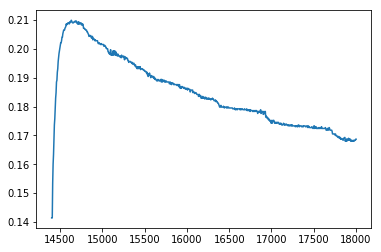

In [24]:
cycle_indeces = batt_cycle.return_cycle_indeces(2, PP_A_break)

cycle_data = PP_A[PP_A.index.isin(cycle_indeces)]
plt.plot(cycle_data['time_sec'], cycle_data['voltage'])

In [25]:
def return_cycle_indeces_v2(df_break):
    """docstring"""
    cycle_data = []
    start = df_break[cycle - 1] + 2
    end = df_break[cycle] - 1
    cycle_index = np.arange(start, end)
    return cycle_index

In [44]:
df = PP_A
df_break = PP_A_break
rest = True

cycle_indeces = []
# saves rest data as index[0], if no rest saves None
if rest == True:
    start = df_break[0] + 2
    end = df_break[1] - 1
    rest_index = np.arange(start, end)
    cycle_indeces.append(rest_index)
    num_cycles = len(df_break)//2
    if len(df_break) % 2 == 0:
        drop_partial = True
    elif len(df_break) % 2 != 0:
        drop_partial = False
    if drop_partial == True:
        for i in np.arange(1, len(df_break)-1, 2):
            charge_start = df_break[i]+2
            charge_end = df_break[i+1]-1
            charge_index = np.arange(charge_start, charge_end)
            discharge_start = df_break[i+1]+2
            discharge_end = df_break[i+2]-1
            discharge_index = np.arange(discharge_start, discharge_end)
            full_cycle_index = [charge_index, discharge_index]
            cycle_indeces.append(full_cycle_index)
    elif drop_partial == False:
        for i in np.arange(1, len(df_break)-3, 2):
            charge_start = df_break[i]+2
            charge_end = df_break[i+1]-1
            charge_index = np.arange(charge_start, charge_end)
            discharge_start = df_break[i+1]+2
            discharge_end = df_break[i+2]-1
            discharge_index = np.arange(discharge_start, discharge_end)
            full_cycle_index = [charge_index, discharge_index]
            cycle_indeces.append(full_cycle_index)
        i = len(df_break)-2
        charge_start = df_break[i]+2
        charge_end = df_break[i+1]-1
        charge_index = np.arange(charge_start, charge_end)
        discharge_start = df_break[i+1]+2
        discharge_end = df.index[-1]
        discharge_index = np.arange(discharge_start, discharge_end)
        full_cycle_index = [charge_index, discharge_index]
        cycle_indeces.append(full_cycle_index)
elif rest == False:
    cycle_indeces.append('No Rest')
    num_cycles = len(df_break)//2
    if len(df_break) % 2 == 0:
        drop_partial = False
    elif len(df_break) % 2 != 0:
        drop_partial = True
    pass




In [45]:
print('num_cycle = {}'.format(num_cycles))
print('rest = {}'.format(rest))
print('drop_partial = {}'.format(drop_partial))
print('len(cycle_indeces) = {}'.format(len(cycle_indeces)))
cycle_indeces[96][1]

num_cycle = 96
rest = True
drop_partial = False
len(cycle_indeces) = 97


array([138701, 138702, 138703, 138704, 138705, 138706, 138707, 138708,
       138709, 138710, 138711, 138712, 138713, 138714, 138715, 138716,
       138717, 138718, 138719, 138720, 138721, 138722, 138723, 138724,
       138725, 138726, 138727, 138728, 138729, 138730, 138731, 138732,
       138733, 138734, 138735, 138736, 138737, 138738, 138739, 138740,
       138741, 138742, 138743, 138744, 138745, 138746, 138747, 138748,
       138749, 138750, 138751, 138752, 138753, 138754, 138755, 138756,
       138757, 138758, 138759, 138760, 138761, 138762, 138763, 138764,
       138765, 138766, 138767, 138768, 138769, 138770, 138771, 138772,
       138773, 138774, 138775, 138776, 138777, 138778, 138779, 138780,
       138781, 138782, 138783, 138784, 138785, 138786, 138787, 138788,
       138789, 138790, 138791, 138792, 138793, 138794, 138795, 138796,
       138797, 138798, 138799, 138800, 138801, 138802, 138803, 138804,
       138805, 138806, 138807, 138808, 138809, 138810, 138811, 138812,
      

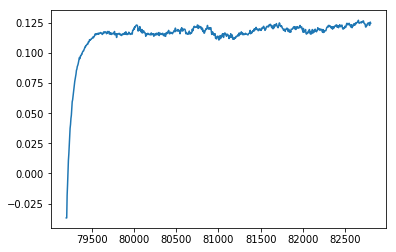

In [71]:
cycle_data = PP_A[PP_A.index.isin(cycle_indeces[10][0])]
plt.plot(cycle_data['time_sec'], cycle_data['voltage'])


In [29]:
len(df_break)

193

In [72]:
type(cycle_data)

pandas.core.frame.DataFrame

In [76]:
# convert to function

def reshape_cycle_indeces(df, df_break, rest=True):
    """
    function that reshapes the outputs of clean_prep_break
    Inputs:
    Returns:
        cylce_indeces, a reshaped dataframe where each cycle is callable
        by cycle number (example: for the 2nd cycle, the charge indeces
        for the cycle is at cycle_indeces[2][0], and the discharge data
        is at cycle_indeces[2][1])
    """
    cycle_indeces = []
    # saves rest data as index[0], if no rest saves None
    if rest == True:
        start = df_break[0] + 2
        end = df_break[1] - 1
        rest_index = np.arange(start, end)
        cycle_indeces.append(rest_index)
        num_cycles = len(df_break)//2
        if len(df_break) % 2 == 0:
            drop_partial = True
        elif len(df_break) % 2 != 0:
            drop_partial = False
        if drop_partial == True:
            for i in np.arange(1, len(df_break)-1, 2):
                charge_start = df_break[i]+2
                charge_end = df_break[i+1]-1
                charge_index = np.arange(charge_start, charge_end)
                discharge_start = df_break[i+1]+2
                discharge_end = df_break[i+2]-1
                discharge_index = np.arange(discharge_start, discharge_end)
                full_cycle_index = [charge_index, discharge_index]
                cycle_indeces.append(full_cycle_index)
        elif drop_partial == False:
            for i in np.arange(1, len(df_break)-3, 2):
                charge_start = df_break[i]+2
                charge_end = df_break[i+1]-1
                charge_index = np.arange(charge_start, charge_end)
                discharge_start = df_break[i+1]+2
                discharge_end = df_break[i+2]-1
                discharge_index = np.arange(discharge_start, discharge_end)
                full_cycle_index = [charge_index, discharge_index]
                cycle_indeces.append(full_cycle_index)
            i = len(df_break)-2
            charge_start = df_break[i]+2
            charge_end = df_break[i+1]-1
            charge_index = np.arange(charge_start, charge_end)
            discharge_start = df_break[i+1]+2
            discharge_end = df.index[-1]
            discharge_index = np.arange(discharge_start, discharge_end)
            full_cycle_index = [charge_index, discharge_index]
            cycle_indeces.append(full_cycle_index)
    elif rest == False:
        cycle_indeces.append('No Rest')
#         num_cycles = len(df_break)//2
#         if len(df_break) % 2 == 0:
#             drop_partial = False
#         elif len(df_break) % 2 != 0:
#             drop_partial = True
        print("""feature not currently supported,
              data must have rest period before first cycle""")
    return cycle_indeces



In [78]:
df = PP_A
df_break = PP_A_break

plot_indeces = reshape_cycle_indeces(df, df_break, rest=True)

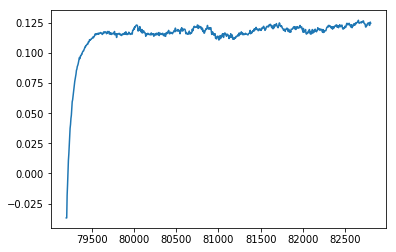

In [79]:
plot_data = df[df.index.isin(plot_indeces[10][0])]
plt.plot(plot_data['time_sec'], plot_data['voltage'])